In [6]:
import json
import requests
import pprint
import time
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from scipy import stats
import json
import sys
import yaml

## Figure: Scalability for L,N-node

In [49]:
output_scalability_lnode = {}
with open("/root/workspace/mfplane/misc/starbed/data/scalability/output_scalability_lnode.yaml", "r") as f:
    output_scalability_lnode = yaml.safe_load(f)
    
output_scalability_nnode = {}
with open("/root/workspace/mfplane/misc/starbed/data/scalability/output_scalability_nnode.yaml", "r") as f:
    output_scalability_nnode = yaml.safe_load(f)

In [78]:
## L-node(bps)
scalability_lnode_bps = []
tmp = sorted(output_scalability_lnode["datas"], 
             key=lambda x: x['num_lnode'])
for d in tmp:
    scalability_lnode_bps.append(d['bps'])

## L-node(pps)
scalability_lnode_pps = []
for bps in scalability_lnode_bps:
    pps = bps / 8 / 100
    scalability_lnode_pps.append(pps)
    
## N-node(bps)    
scalability_nnode_bps = []
tmp = sorted(output_scalability_nnode["datas"],
             key=lambda x: x['num_nnode'])
for d in tmp:
    scalability_nnode_bps.append(d['bps'])
    
## N-node(pps)
scalability_nnode_pps = []
for bps in scalability_nnode_bps:
    pps = bps / 8 / 100
    scalability_nnode_pps.append(pps)

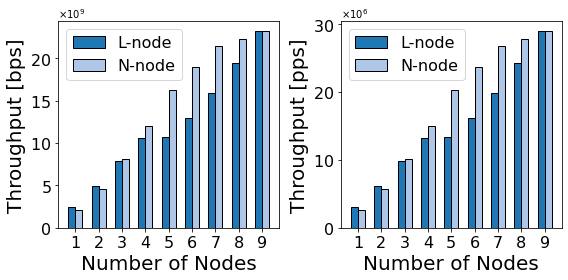

In [95]:
fs = 20
tick_fs = 16

labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
values1 = scalability_lnode_bps
values2 = scalability_nnode_bps

# 棒の位置を指定
x = np.arange(len(labels))
width = 0.3 # 棒の幅

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
pc = plt.cycler("color", plt.get_cmap("tab20").colors)
plt.rcParams["axes.prop_cycle"] = pc

# AX1
rects1 = ax1.bar(x - width/2, values1, width,
                 label='L-node', edgecolor='black')
rects2 = ax1.bar(x + width/2, values2, width,
                 label='N-node', edgecolor='black')
ax1.set_ylabel('Throughput [bps]', fontsize=fs)
ax1.tick_params(axis='y', labelsize=tick_fs)
ax1.set_xlabel('Number of Nodes', fontsize=fs)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, fontsize=tick_fs)
ax1.legend(fontsize=tick_fs)
formatter9 = ticker.ScalarFormatter(useMathText=True)
formatter9.set_powerlimits((9, 9))
ax1.yaxis.set_major_formatter(formatter9)

# AX2
ax2.bar(x - width/2, scalability_lnode_pps,
        width, label='L-node', edgecolor='black')
ax2.bar(x + width/2, scalability_nnode_pps,
        width, label='N-node', edgecolor='black')
ax2.set_ylabel('Throughput [pps]', fontsize=fs)
ax2.tick_params(axis='y', labelsize=tick_fs)
ax2.set_xlabel('Number of Nodes', fontsize=fs)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, fontsize=tick_fs)
ax2.legend(fontsize=tick_fs)
formatter6 = ticker.ScalarFormatter(useMathText=True)
formatter6.set_powerlimits((6, 6))
ax2.yaxis.set_major_formatter(formatter6)

# グラフを表示
plt.tight_layout()
plt.savefig("/root/workspace/mfplane/misc/starbed/data/scalability/output.pdf")
plt.show()

## Matplotlib Playgrou

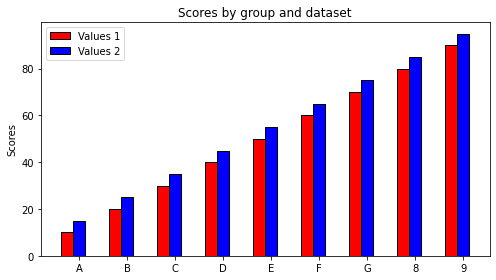

In [77]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', '8', '9']
values1 = [10, 20, 30, 40, 50, 60, 70, 80, 90]
values2 = [15, 25, 35, 45, 55, 65, 75, 85, 95]
#values3 = [5, 15, 25, 35, 45, 55, 65, 75, 85]

# 棒の位置を指定
x = np.arange(len(labels))
width = 0.25 # 棒の幅

fig, ax = plt.subplots(figsize=(7, 4))

# 各データセットの棒グラフを描画（枠線を追加）
rects1 = ax.bar(x - width, values1, width, label='Values 1', color='r', edgecolor='black')
rects2 = ax.bar(x, values2, width, label='Values 2', color='b', edgecolor='black')

# y軸のラベル、タイトル、凡例を追加
ax.set_ylabel('Scores')
ax.set_title('Scores by group and dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# グラフを表示
plt.tight_layout()
plt.show()

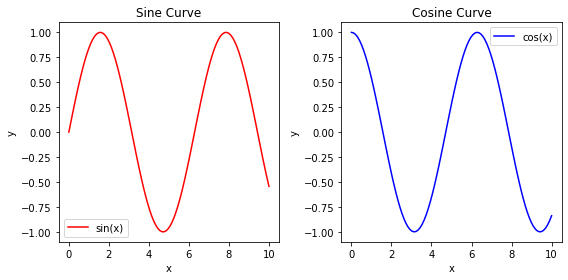

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# サンプルデータ
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 1行2列のサブプロットを作成
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 左側のサブプロットにデータをプロット
ax1.plot(x, y1, label='sin(x)', color='r')
ax1.set_title('Sine Curve')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()

# 右側のサブプロットにデータをプロット
ax2.plot(x, y2, label='cos(x)', color='b')
ax2.set_title('Cosine Curve')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()

# サブプロット間のスペースを調整
plt.tight_layout()

plt.show()